# Pytorch Workflow 


In [6]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

# check the version 
torch.__version__

RuntimeError: Only a single TORCH_LIBRARY can be used to register the namespace triton; please put all of your definitions in a single TORCH_LIBRARY block.  If you were trying to specify implementations, consider using TORCH_LIBRARY_IMPL (which can be duplicated).  If you really intended to define operators for a single namespace in a distributed way, you can use TORCH_LIBRARY_FRAGMENT to explicitly indicate this.  Previous registration of TORCH_LIBRARY was registered at c:\Users\anant\AppData\Local\Programs\Python\Python314\Lib\site-packages\torch\__init__.py:2700; latest registration was registered at c:\Users\anant\AppData\Local\Programs\Python\Python314\Lib\site-packages\torch\__init__.py:2700

### 1. Data (preparing and loading)

Data can be almost anything ... in machine learning 

* Excel speadsheet 
* Images 
* Videos (youtube has lots of data ...)
* Audio like songs or podcasts 
* DNA

Machine learning is a game of two parts :

1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

We'll use a linear regression formula to make straight line with known **parameters**


In [ ]:
# Create *known* parameters

weight = 0.7
bias = 0.3

#create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X) , len(y)

(50, 50)

### Spilitting data into training and test sets 

In [ ]:
# Create a train/test spilt 

train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

how might we better visualise pur data?

this is where the data explorer's motto comes in!
" Visualise , visualise , visualise! "

NameError: name 'predictions' is not defined

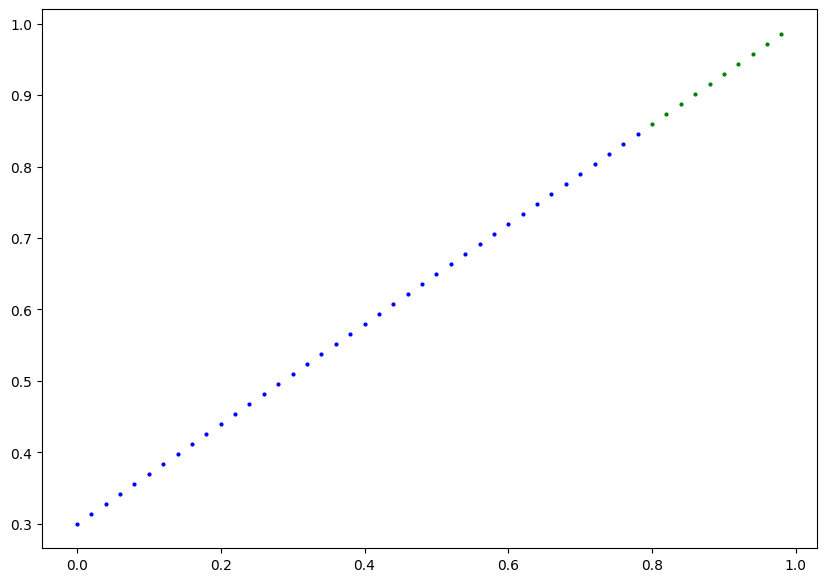

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", s=4, label="Train data")
plt.scatter(X_test, y_test, c="g", s=4, label="Test data")


if(predictions is not None):
    plt.scatter(X_test, predictions, c="r", s=4, label="Predictions")

plt.legend(prop={"size" : 14})

### 2. Build Model 

our first pytorch model!

what our model does:?
* Starts with random values (weight & bias)
* Look at the training data and adjust the random values to better represent ( or get closer to) the ideal values ( the weight and bias) values we used to create the data 

How does it do so?

Through two main algorithim
* Gradient descent
* Back Propagation

In [ ]:
from torch import nn

# Create linear regression model class

class LinearRegreessionModel(nn.Module): #<- almost everthing in pytorch inherits from nn.module 
    def __init__(self):
         super().__init__()
         self.weight = nn.Parameter(torch.randn( # <- start with a random weight and try to adjust it to the ideal weight 
              1,
              requires_grad = True, # can thid be updated via gradient descent?
              dtype=torch.float32 #<- pytorch loves the datatype torch.float32
              ))
         self.bias = nn.Parameter(torch.randn(
              1, # startrs with a random bias and try to adjust it to ideal bias 
              requires_grad = True, # can this be updated via gradient descent?
              dtype = torch.float32
              ))
         
# Forward method to define the computation in the model 
    def forward(self , x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
         return self.weight * x + self.bias # this is linear regression

         


KeyboardInterrupt: 

### Pytorch model building essentials 

* Torch.nn - contains all of the building for computational graphs 
* Torch.nn.Parameter - what should our model try and learn , often a pytorch layer from torch.nn will set these for us 
* torch.nn.Module - the base class for all neural network modules , If you subclass it , you  should over write forward()
* torch.optim -  this were the optimizers in Pytorch live , they will help with gradient descent 
* def forward() - all nn.Module subclass require you in the forward computation 

### Checking the contents of a Pytorch model

Now we've created a model , let's see what's inside..
So , we can check our model parameters or what's inside our model using .parameters()

In [ ]:
torch.rand(1)

tensor([0.9079])

In [ ]:
# Create a random seed 
torch.manual_seed(42)

#Create a model instance of model 
model_0 = LinearRegreessionModel()

#Check out the parameters 
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`
To check our model's predictive power , let's see how well it predicts y_test based on x_test , When we pass data through our model , its going to run it through the forward() method.

In [ ]:
y_preds = model_0(X_test)
y_preds[:5]

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251]], grad_fn=<SliceBackward0>)

In [ ]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds[:5]

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

##  3. Train model

the whole ideas of training for a model to move from some unknown parameters (these may be random) to some known parameters or in other words from a poor representation of the data to a better representation data 

One way to measure how poor or how wrong your models predictions are is to use a loss function

* Note: Loss function may also be called cost function or criterion in different areas . For our case , we're going to refer it to a loss function 

*  **Loss function** A function to measure how wrong your model predictions are  to the ideal outputs 

* **Optimiser** taken into the loss of a model and adjusts the model's parameter

And specifically for pytorch , we need:

* A Training loop
* A Testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out the model parameter
model_0.state_dict()
#A parameter  is a value that the model sets itself()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function and optimizer 
Loss_fn = nn.L1Loss() # <- mean absolute error 

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.01
) # learning rate is the most important hyperparameter 

### Building a Training loop (and a testing loop) in pytorch

A couple of things we need in a training loops:
0. Loop through the data 
1. Forward pass ( this involves data moving through our model's `forward()` function) to make predictions in data - also called forward propagation
2. Calcualate the loss ( compare forward pass predictions to ground truth labels)
3. Optimizer  zero grad
4. Loss backward -  move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**Backpropagation**)
5. Optimizer step - use the optimizer to adjust  our model's parameters to  try and improve the loss(**Gradient descent**)

In [ ]:

with torch.inference_mode():
    list(model_0.parameters())

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# An epoch is one loop through data 
# this is the hyper parameter because we've set it ourselves
epochs = 10

# 0. Loop through the data 
for epoch in range(epochs):
    # Set the model to training data 
    model_0.train() #train model and sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss 
    loss = Loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimiser (perfrom gradient descent)
    optimizer.step() # by default how the optimiser changes will acculumate throught the loop 


    model_0.eval() #turns pff gradient tracking 

NameError: name 'model_0' is not defined